# NAME: JAPNEET KAUR BHATIA

## Task # 5 - To explore Business Analytics


### PROBLEM STATEMENT: Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? 



### DATASET: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [63]:
#import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#loading dataset
df=pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [65]:
#checking dimension of dataset
df.shape

(9994, 13)

In [66]:
#checking all column names of dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [67]:
#calculating statistical data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [68]:
# To find pairwise correlation of all columns in dataset
corr = df.corr()
corr.head()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


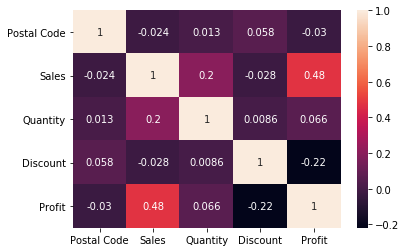

In [69]:
# To represent 2D graph of data
sns.heatmap(corr,annot = True, xticklabels = corr.columns.values , yticklabels = corr.columns.values )
plt.show()

In [70]:
#check for number of null values in column
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [71]:
#To check data-types of variables
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [72]:
# To determine Numerical Features of dataset
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of Numerical Features : ' ,len(num_features))
df[num_features].head()

Number of Numerical Features :  5


,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


In [73]:
# To determine Discrete Features of dataset
dis_features = [feature for feature in num_features if len(df[feature].unique())<25]
print('Number of Discrete Features : ' ,len(dis_features))
dis_features

Number of Discrete Features :  2


['Quantity', 'Discount']

In [74]:
# add 'Postel Code' in discrete feature
dis_features.append('Postal Code')
dis_features

['Quantity', 'Discount', 'Postal Code']

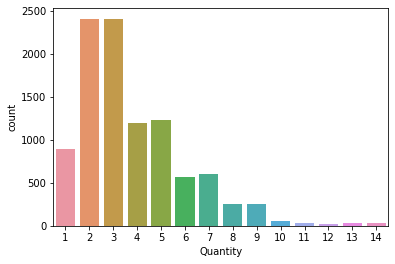

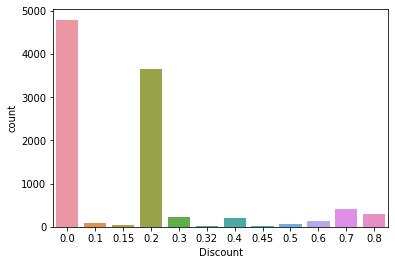

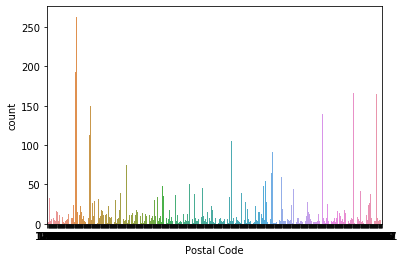

In [75]:
# To determine count of observations using plot
for feature in dis_features:
    sns.countplot(x=feature,data=df)
    plt.show()

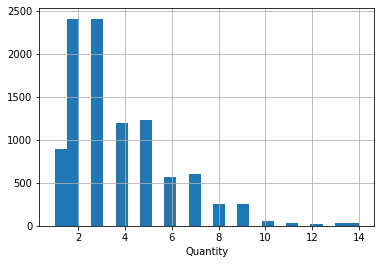

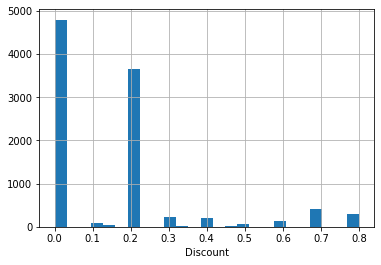

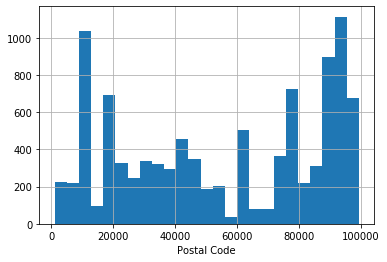

In [76]:
# To plot histogram
for feature in dis_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

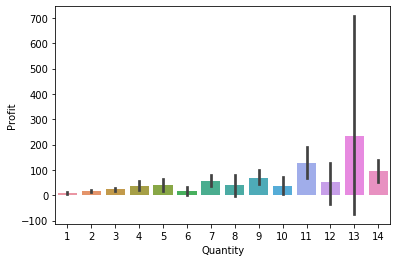

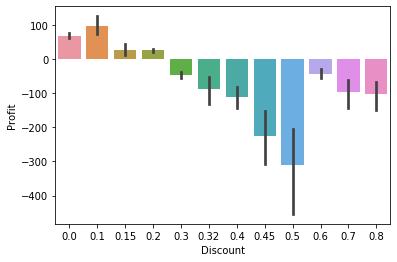

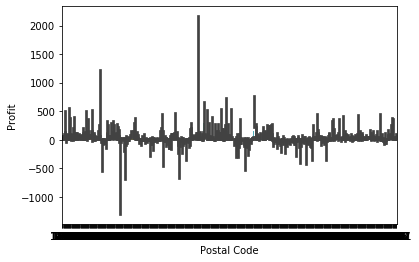

In [77]:
# To plot barplot between discrete features and Profit
for feature in dis_features:
    sns.barplot(x=feature, y ='Profit', data = df)
    plt.show()

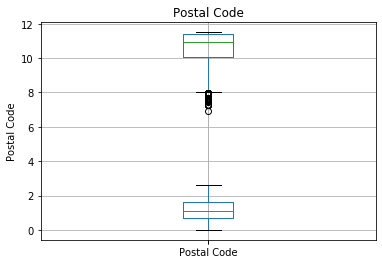

In [78]:
# To plot boxplot for univariate variable
for feature in dis_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show

In [79]:
# To determine Continuous Features of dataset
con_features = [feature for feature in num_features if feature not in dis_features]
print('Number of continuous features : ' , len(con_features))
con_features

Number of continuous features :  2


['Sales', 'Profit']

In [80]:
# To remove Profit from list of Continuous Features
con_features.remove('Profit')
con_features

['Sales']

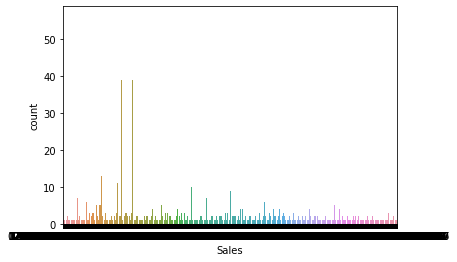

In [81]:
# To determine count of observations using plot
for feature in con_features:
    sns.countplot(x=feature,data=df)
    plt.show()

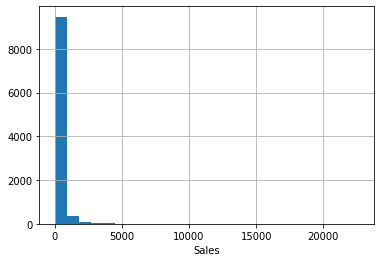

In [82]:
# To plot histogram
for feature in con_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

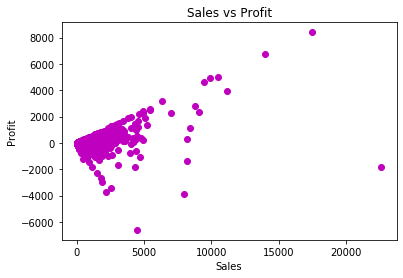

In [83]:
#PLot scatterplot 
for feature in con_features:
    plt.scatter(x=df[feature],y=df['Profit'],c='m')
    plt.title('Sales vs Profit')
    plt.xlabel('Sales')
    plt.ylabel('Profit')

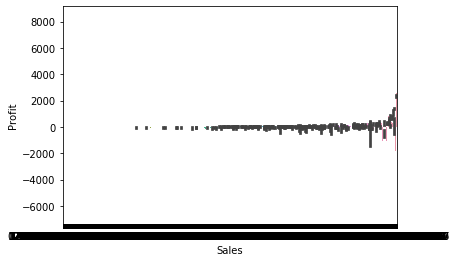

In [84]:
# To plot barplot between continuous features and Profit
for feature in con_features:
    sns.barplot(x=feature,y='Profit',data=df)
    plt.show()

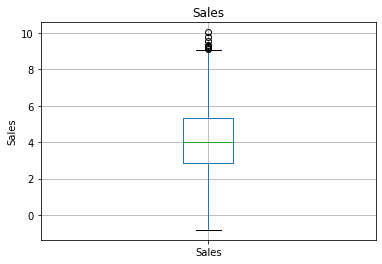

In [85]:
# To plot boxplot for univariate variable
for feature in con_features:
     if 0 in df[feature].unique():
        pass
     else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show

In [86]:
# To determine Categorical features 
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features : ', len(cat_features))
cat_features

Number of categorical features :  8


['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category']

In [87]:
# To determine Categies in each categorical variable 
for feature in cat_features:
    print(f'({feature}) have ({len(df[feature].unique())}) categories')

(Ship Mode) have (4) categories
(Segment) have (3) categories
(Country) have (1) categories
(City) have (531) categories
(State) have (49) categories
(Region) have (4) categories
(Category) have (3) categories
(Sub-Category) have (17) categories


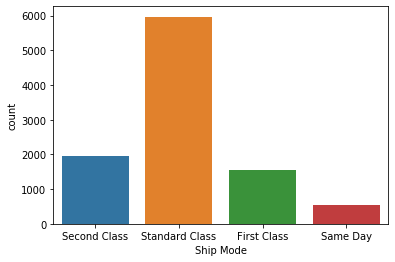

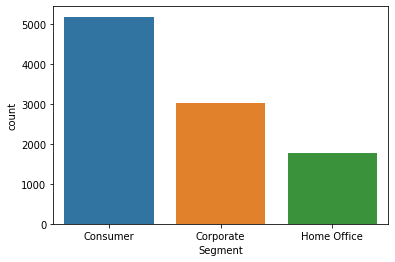

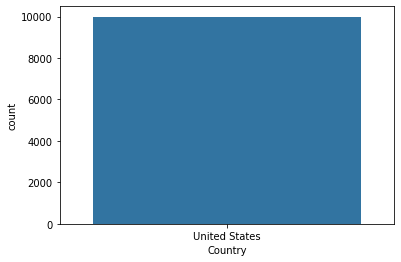

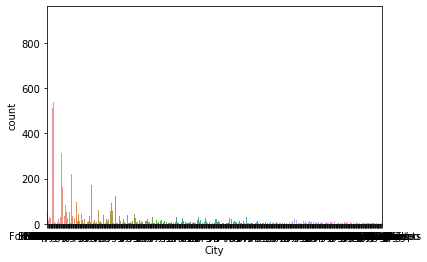

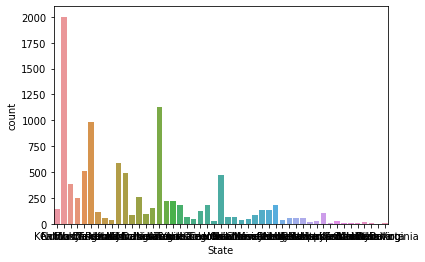

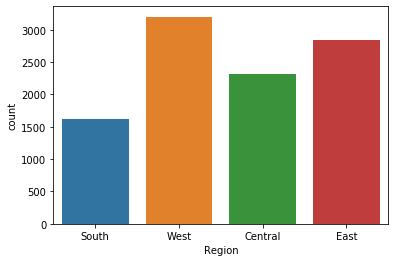

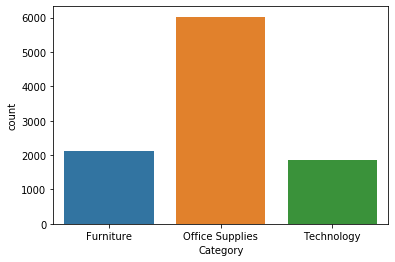

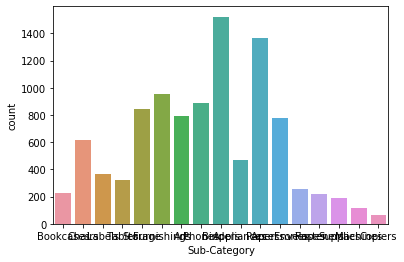

In [88]:
# To determine count of observations using countplot
for feature in cat_features:
    sns.countplot(x=feature,data=df)
    plt.show()

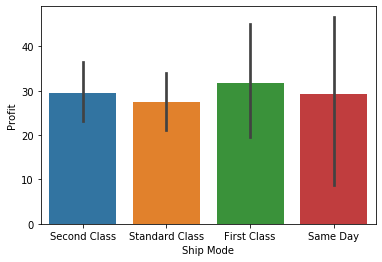

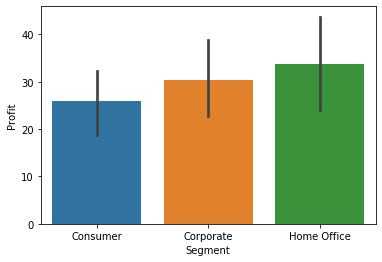

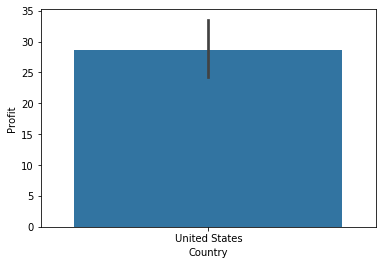

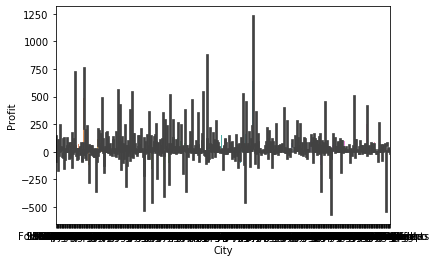

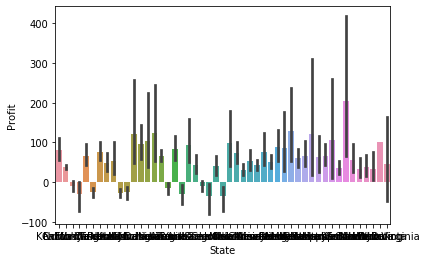

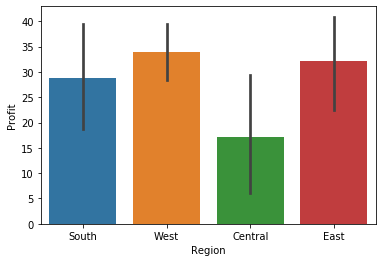

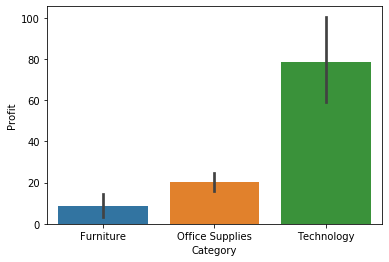

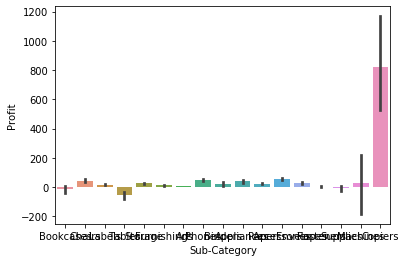

In [89]:
# To plot barplot between continuous features and Profit
for feature in cat_features:
    sns.barplot(x=feature,y='Profit',data=df)
    plt.show()

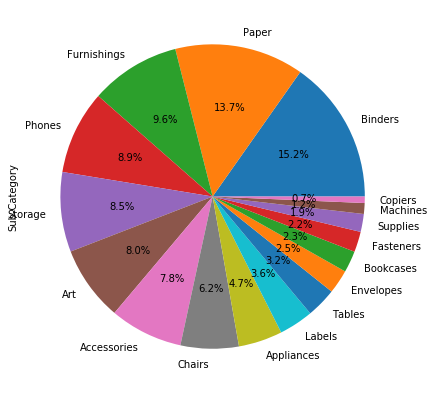

In [90]:
# To plot pie chart for Subcategories
plt.figure(figsize = (11,7))
df['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

C:\Users\Japneet\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 792x504 with 0 Axes>

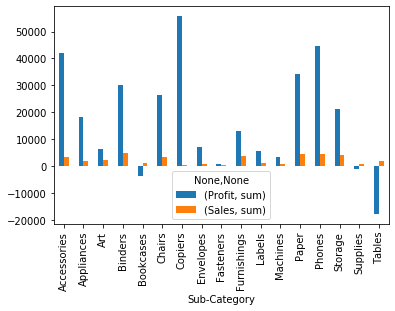

In [91]:
# To plot bargraph
plt.figure(figsize=(11,7))
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

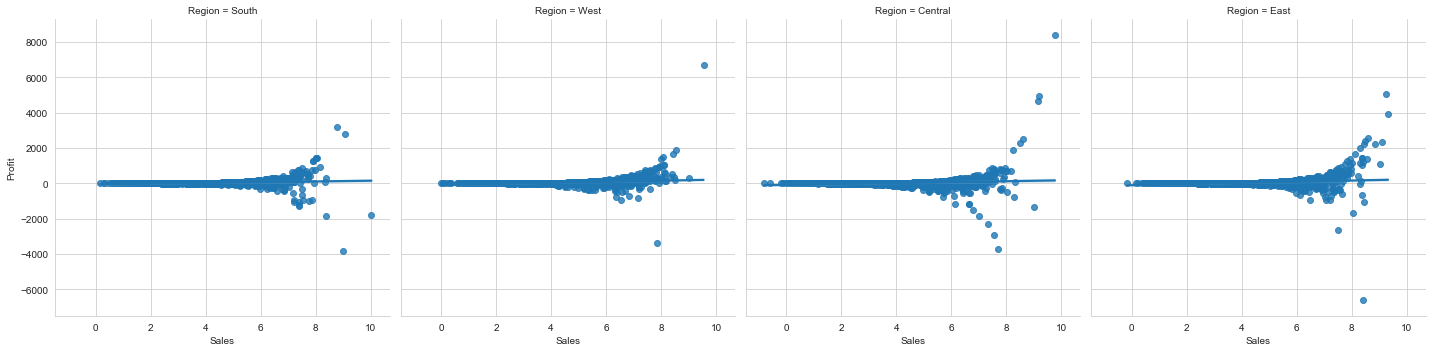

In [92]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Sales', y ='Profit', col = 'Region', data = df )

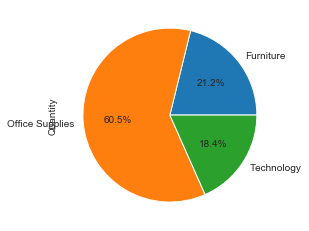

In [93]:
df.groupby('Category')['Quantity'].sum().plot.pie(autopct='%1.1f%%')
plt.show()

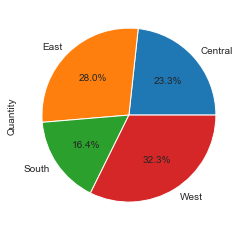

In [94]:
df.groupby('Region')['Quantity'].sum().plot.pie(autopct='%1.1f%%')
plt.show()

In [95]:
top = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending = False)
top

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


In [96]:
top_sub_categories = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending = False)
top_sub_categories 

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


In [97]:
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False)

Sub-Category
Binders        1829.646424
Paper          1592.478422
Furnishings    1109.261991
Phones         1015.628203
Storage         971.800610
Art             929.557117
Accessories     914.363129
Chairs          723.370948
Appliances      538.258316
Labels          425.131068
Tables          371.507861
Envelopes       282.156196
Fasteners       277.858995
Bookcases       265.063720
Supplies        205.956292
Machines        137.240011
Copiers          74.025766
Name: Quantity, dtype: float64

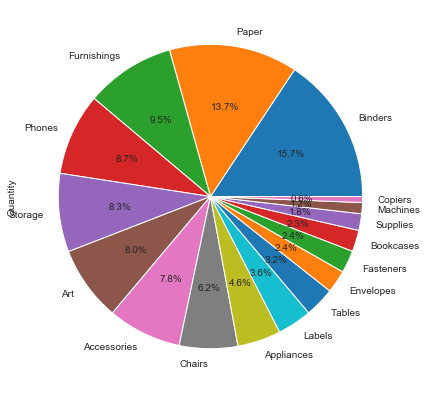

In [98]:
plt.figure(figsize=(11,7))
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.pie(autopct='%1.1f%%')
plt.show()